# Importing

In [47]:
import pandas as pd
import numpy as np
import joblib
import os

# for waterfall plot
import shap
import matplotlib
import matplotlib.pyplot as plt
import dataclasses
from typing import Union
import matplotlib.patches as mpatches

# for report
import ipywidgets as widgets
from io import BytesIO

# for load the data pre-preparation function
import importlib.util


In [3]:
np.set_printoptions(suppress=False)

work_dir = r'C:\Users\krasavica\Desktop\Projekty - DS\python-project-ApartmentPriceAnalysis'
os.chdir(work_dir)

pd.set_option('display.float_format', '{:.2f}'.format)

In [15]:
model = joblib.load("production_pipeline_objects/trained_model.joblib")

X = pd.read_csv("3. Feature importance and report/feature_imp_data_X.csv", index_col = 0)
y = pd.read_csv("3. Feature importance and report/feature_imp_data_y.csv", index_col = 0)

# Oryginal report

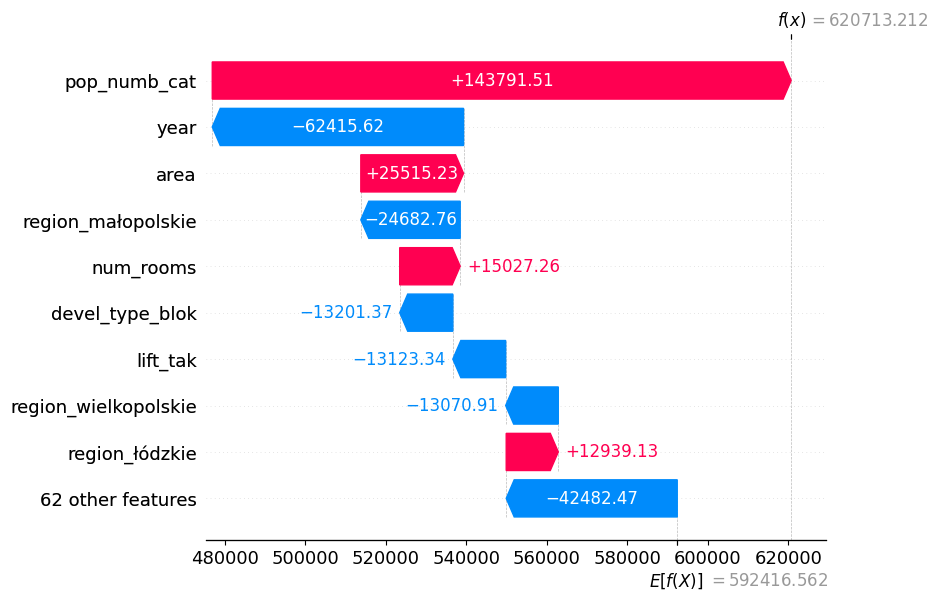

In [17]:
explainer = shap.TreeExplainer(model)
base_value = np.mean(y, axis=None)

shap_values_example = explainer.shap_values(X.iloc[5])
shap_values_example = shap.Explanation(values=shap_values_example,
                                       base_values = base_value,
                                       feature_names = X.columns)

plt.rcParams['figure.facecolor'] = 'white' 
shap.plots.waterfall(shap_values_example, show = False)
plt.show()

# Adopting the watrefall plot

In [20]:
base_value = np.mean(y, axis=None)
base_value_df = pd.DataFrame([base_value],
                             columns = ["base_value"])
base_value_df.to_csv("production_pipeline_objects/shap_base_value")

In [37]:
feature_names_pl = {'area': "Powierzchnia",
                    'num_rooms': "Liczba pokoi",
                    'parking': "Miejsce parkingowe",
                    'year': "Rok budowy",
                    'rent_cat': "Czynsz",
                    'number_floor_in_building':"Wysokość budynku",
                    'ap_floor': "Piętro",
                    'utilities_telewizja kablowa': "Telewizja kablowa",
                    'utilities_internet': "Internet",
                    'utilities_telefon': "Telefon",
                    'security_drzwi / okna antywłamaniowe': "Drzwi / okna antywłamaniowe",
                    'security_teren zamknięty': "Teren zamknięty",
                    'security_monitoring / ochrona': "Monitoring / ochrona",
                    'security_domofon / wideofon': "Domofon / wideofon",
                    'security_rolety antywłamaniowe': "Rolety antywłamaniowe",
                    'security_system alarmowy': "System alarmowy",
                    'equipment_zmywarka': "Zmywarka",
                    'equipment_lodówka': "Lodówka",
                    'equipment_meble': "Meble",
                    'equipment_piekarnik': "Piekarnik",
                    'equipment_kuchenka' : "Kuchenka",
                    'equipment_pralka': "Pralka",
                    'equipment_telewizor': "Telewizor",
                    'add_inf_pom. użytkowe': "Pom. użytkowe",
                    'add_inf_piwnica': "Piwnica",
                    'add_inf_dwupoziomowe': "Mieszkanie dwupoziomowe",
                    'add_inf_oddzielna kuchnia': "Oddzielna kuchnia",
                    'add_inf_klimatyzacja': "Klimatyzacja",
                    'perks_balkon': "Balkon",
                    'perks_taras': "Taras",
                    'perks_ogródek': "Ogródek",
                    'pop_numb_cat': "Liczba mieszkańców",
                    'with_powiat_rights': "Miejscowość na prawach powiatu",
                    'pop_dens_cat': "Gęstość zaludnienia",
                    'ownership_status': "Forma własności",
                    'flat_condition': "Stan wykończenia",
                    'heating': "Ogrzewanie",
                    'market_pierwotny': "Rynek",
                    'ad_type_prywatny': "Ogłoszeniodawca",
                    'windows': "Materiał okien",
                    'lift_tak': "Winda",
                    'mater': "Materiał budynku",
                    'devel_type': "Typ zabudowy",
                    'region': "Województwo"}

In [28]:
labels = {
    "MAIN_EFFECT": "SHAP main effect value for\n%s",
    "INTERACTION_VALUE": "SHAP interaction value",
    "INTERACTION_EFFECT": "SHAP interaction value for\n%s and %s",
    "VALUE": "SHAP value (impact on model output)",
    "GLOBAL_VALUE": "mean(|SHAP value|) (average impact on model output magnitude)",
    "VALUE_FOR": "SHAP value for\n%s",
    "PLOT_FOR": "SHAP plot for %s",
    "FEATURE": "Feature %s",
    "FEATURE_VALUE": "Feature value",
    "FEATURE_VALUE_LOW": "Low",
    "FEATURE_VALUE_HIGH": "High",
    "JOINT_VALUE": "Joint SHAP value",
    "MODEL_OUTPUT": "Model output value",
}

RGBColorType = Union[tuple[float, float, float], str]
RGBAColorType = Union[
    str,  # "none" or "#RRGGBBAA"/"#RGBA" hex strings
    tuple[float, float, float, float],
    # 2 tuple (color, alpha) representations, not infinitely recursive
    # RGBColorType includes the (str, float) tuple, even for RGBA strings
    tuple[RGBColorType, float],
    # (4-tuple, float) is odd, but accepted as the outer float overriding A of 4-tuple
    tuple[tuple[float, float, float, float], float],
]

ColorType = Union[RGBColorType, RGBAColorType, np.ndarray]

@dataclasses.dataclass
class StyleConfig:
    """A complete set of configuration options for matplotlib-based shap plots."""

    primary_color_positive: ColorType
    primary_color_negative: ColorType
    secondary_color_positive: ColorType
    secondary_color_negative: ColorType
    hlines_color: ColorType
    vlines_color: ColorType
    text_color: ColorType
    tick_labels_color: ColorType

    def asdict(self):
        return dataclasses.asdict(self)

    
_shap_defaults = StyleConfig(
    primary_color_positive=shap.plots.colors.red_rgb,
    primary_color_negative=shap.plots.colors.blue_rgb,
    secondary_color_positive=shap.plots.colors.light_red_rgb,
    secondary_color_negative=shap.plots.colors.light_blue_rgb,
    hlines_color="#cccccc",
    vlines_color="#bbbbbb",
    text_color="white",
    tick_labels_color="#999999",
)

def load_default_style() -> StyleConfig:
    """Load the default style configuration."""
    # In future, this could allow reading from a persistent config file, like matplotlib rcParams.
    return _shap_defaults

_STYLE = load_default_style()

def get_style() -> StyleConfig:
    """Return all currently active global style configuration options."""
    return _STYLE

#from .. import Explanation
#from ..utils import format_value
#from ._labels import labels
#from ._style import get_style

# TODO: If we make a JS version of this plot then we could let users click on a bar and then see the dependence
# plot that is associated with that feature get overlaid on the plot...it would quickly allow users to answer
# why a feature is pushing down or up. Perhaps the best way to do this would be with an ICE plot hanging off
# of the bar...
def waterfall(shap_values, max_display=10, show=True):
    """Plots an explanation of a single prediction as a waterfall plot.

    The SHAP value of a feature represents the impact of the evidence provided by that feature on the model's
    output. The waterfall plot is designed to visually display how the SHAP values (evidence) of each feature
    move the model output from our prior expectation under the background data distribution, to the final model
    prediction given the evidence of all the features.

    Features are sorted by the magnitude of their SHAP values with the smallest
    magnitude features grouped together at the bottom of the plot when the number of
    features in the models exceeds the ``max_display`` parameter.

    Parameters
    ----------
    shap_values : Explanation
        A one-dimensional :class:`.Explanation` object that contains the feature values and SHAP values to plot.

    max_display : int
        The maximum number of features to display (default is 10).

    show : bool
        Whether :external+mpl:func:`matplotlib.pyplot.show()` is called before returning.
        Setting this to ``False`` allows the plot to be customized further after it
        has been created, returning the current axis via plt.gca().

    Examples
    --------
    See `waterfall plot examples <https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/waterfall.html>`_.

    """
    
    style = get_style()
    # Turn off interactive plot
    if show is False:
        plt.ioff()

    # make sure the input is an Explanation object
    if not isinstance(shap_values, shap.Explanation):
        emsg = "The waterfall plot requires an `Explanation` object as the `shap_values` argument."
        raise TypeError(emsg)

    # make sure we only have a single explanation to plot
    sv_shape = shap_values.shape
    if len(sv_shape) != 1:
        emsg = (
            "The waterfall plot can currently only plot a single explanation, but a "
            f"matrix of explanations (shape {sv_shape}) was passed! Perhaps try "
            "`shap.plots.waterfall(shap_values[0])` or for multi-output models, "
            "try `shap.plots.waterfall(shap_values[0, 0])`."
        )
        raise ValueError(emsg)

    base_values = shap_values.base_values.iloc[0]
    features = shap_values.display_data if shap_values.display_data is not None else shap_values.data
    feature_names = shap_values.feature_names
    feature_names = [feature_names_pl.get(name, name) for name in feature_names]
    lower_bounds = getattr(shap_values, "lower_bounds", None)
    upper_bounds = getattr(shap_values, "upper_bounds", None)
    values = shap_values.values

    # unwrap pandas series
    if isinstance(features, pd.Series):
        if feature_names is None:
            feature_names = list(features.index)
        features = features.values

    # fallback feature names
    if feature_names is None:
        feature_names = np.array([labels["FEATURE"] % str(i) for i in range(len(values))])

    # init variables we use for tracking the plot locations
    num_features = min(max_display, len(values))
    row_height = 0.5
    rng = range(num_features - 1, -1, -1)
    order = np.argsort(-np.abs(values))
    pos_lefts = []
    pos_inds = []
    pos_widths = []
    pos_low = []
    pos_high = []
    neg_lefts = []
    neg_inds = []
    neg_widths = []
    neg_low = []
    neg_high = []
    loc = base_values + values.sum()
    yticklabels = ["" for _ in range(num_features + 1)]

    # size the plot based on how many features we are plotting
    plt.gcf().set_size_inches(10, num_features * row_height + 1.5)

    # see how many individual (vs. grouped at the end) features we are plotting
    if num_features == len(values):
        num_individual = num_features
    else:
        num_individual = num_features - 1

    # compute the locations of the individual features and plot the dashed connecting lines
    for i in range(num_individual):
        sval = values[order[i]]
        loc -= sval
        if sval >= 0:
            pos_inds.append(rng[i])
            pos_widths.append(sval)
            if lower_bounds is not None:
                pos_low.append(lower_bounds[order[i]])
                pos_high.append(upper_bounds[order[i]])
            pos_lefts.append(loc)
        else:
            neg_inds.append(rng[i])
            neg_widths.append(sval)
            if lower_bounds is not None:
                neg_low.append(lower_bounds[order[i]])
                neg_high.append(upper_bounds[order[i]])
            neg_lefts.append(loc)
        if num_individual != num_features or i + 4 < num_individual:
            plt.plot(
                [loc, loc],
                [rng[i] - 1 - 0.4, rng[i] + 0.4],
                color=style.vlines_color,
                linestyle="--",
                linewidth=0.5,
                zorder=-1,
            )
        if features is None:
            yticklabels[rng[i]] = feature_names[order[i]]
        else:
            if np.issubdtype(type(features[order[i]]), np.number):
                yticklabels[rng[i]] = (
                    shap.utils.format_value(float(features[order[i]]), "%0.03f") + " = " + feature_names[order[i]]
                )
            else:
                yticklabels[rng[i]] = str(features[order[i]]) + " = " + str(feature_names[order[i]])

    # add a last grouped feature to represent the impact of all the features we didn't show
    if num_features < len(values):
        yticklabels[0] = "%d pozostałe czynniki" % (len(values) - num_features + 1)
        remaining_impact = base_values - loc
        if remaining_impact < 0:
            pos_inds.append(0)
            pos_widths.append(-remaining_impact)
            pos_lefts.append(loc + remaining_impact)
        else:
            neg_inds.append(0)
            neg_widths.append(-remaining_impact)
            neg_lefts.append(loc + remaining_impact)

    points = (
        pos_lefts
        + list(np.array(pos_lefts) + np.array(pos_widths))
        + neg_lefts
        + list(np.array(neg_lefts) + np.array(neg_widths))
    )
    dataw = np.max(points) - np.min(points)

    # draw invisible bars just for sizing the axes
    label_padding = np.array([0.1 * dataw if w < 1 else 0 for w in pos_widths])
    plt.barh(
        pos_inds,
        np.array(pos_widths) + label_padding + 0.02 * dataw,
        left=np.array(pos_lefts) - 0.01 * dataw,
        color=style.primary_color_positive,
        alpha=0,
    )
    label_padding = np.array([-0.1 * dataw if -w < 1 else 0 for w in neg_widths])
    plt.barh(
        neg_inds,
        np.array(neg_widths) + label_padding - 0.02 * dataw,
        left=np.array(neg_lefts) + 0.01 * dataw,
        color=style.primary_color_negative,
        alpha=0,
    )

    # define variable we need for plotting the arrows
    head_length = 0.08
    bar_width = 0.8
    xlen = plt.xlim()[1] - plt.xlim()[0]
    fig = plt.gcf()
    ax = plt.gca()
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width = bbox.width
    bbox_to_xscale = xlen / width
    hl_scaled = bbox_to_xscale * head_length
    renderer = fig.canvas.get_renderer()

    # draw the positive arrows
    txt_obj_pos_arrows = []
    for i in range(len(pos_inds)):
        dist = pos_widths[i]
        arrow_obj = plt.arrow(
            pos_lefts[i],
            pos_inds[i],
            max(dist - hl_scaled, 0.000001),
            0,
            head_length=min(dist, hl_scaled),
            color=style.primary_color_positive,
            width=bar_width,
            head_width=bar_width,
        )

        if pos_low is not None and i < len(pos_low):
            plt.errorbar(
                pos_lefts[i] + pos_widths[i],
                pos_inds[i],
                xerr=np.array([[pos_widths[i] - pos_low[i]], [pos_high[i] - pos_widths[i]]]),
                ecolor=style.secondary_color_positive,
            )

        txt_obj = plt.text(
            pos_lefts[i] + 0.5 * dist,
            pos_inds[i],
            f"{np.round(pos_widths[i]/1000, 1)}K PLN",
            horizontalalignment="center",
            verticalalignment="center",
            color=style.text_color,
            fontsize=12,
        )
        text_bbox = txt_obj.get_window_extent(renderer=renderer)
        arrow_bbox = arrow_obj.get_window_extent(renderer=renderer)

        # if the text overflows the arrow then draw it after the arrow
        if (text_bbox.width + 5) > arrow_bbox.width:
            txt_obj.remove()

            txt_obj = plt.text(
                pos_lefts[i] + (5 / 72) * bbox_to_xscale + dist,
                pos_inds[i],
                f"{np.round(pos_widths[i]/1000, 1)}K PLN",
                horizontalalignment="left",
                verticalalignment="center",
                color=style.primary_color_positive,
                fontsize=12,
            )
            txt_obj_x_axes = pos_lefts[i] + (5 / 72) * bbox_to_xscale + dist
            text_obj_dist = dist*(text_bbox.width + 5)/arrow_bbox.width
            txt_obj_pos_arrows.append(txt_obj_x_axes + text_obj_dist)

    # draw the negative arrows
    txt_obj_neg_arrows = []
    for i in range(len(neg_inds)):
        dist = neg_widths[i]

        arrow_obj = plt.arrow(
            neg_lefts[i],
            neg_inds[i],
            -max(-dist - hl_scaled, 0.000001),
            0,
            head_length=min(-dist, hl_scaled),
            color=style.primary_color_negative,
            width=bar_width,
            head_width=bar_width,
        )

        if neg_low is not None and i < len(neg_low):
            plt.errorbar(
                neg_lefts[i] + neg_widths[i],
                neg_inds[i],
                xerr=np.array([[neg_widths[i] - neg_low[i]], [neg_high[i] - neg_widths[i]]]),
                ecolor=style.secondary_color_negative,
            )

        txt_obj = plt.text(
            neg_lefts[i] + 0.5 * dist,
            neg_inds[i],
            f"{np.round(neg_widths[i]/1000, 1)}K PLN",
            horizontalalignment="center",
            verticalalignment="center",
            color=style.text_color,
            fontsize=12,
        )
        text_bbox = txt_obj.get_window_extent(renderer=renderer)
        arrow_bbox = arrow_obj.get_window_extent(renderer=renderer)

        # if the text overflows the arrow then draw it after the arrow
        if (text_bbox.width + 5) > arrow_bbox.width:
            txt_obj.remove()

            txt_obj = plt.text(
                neg_lefts[i] - (5 / 72) * bbox_to_xscale + dist,
                neg_inds[i],
                f"{np.round(neg_widths[i]/1000, 1)}K PLN",
                horizontalalignment="right",
                verticalalignment="center",
                color=style.primary_color_negative,
                fontsize=12,
            )
            
            txt_obj_x_axes = neg_lefts[i] - (5 / 72) * bbox_to_xscale + dist
            text_obj_dist = dist*(text_bbox.width + 5)/arrow_bbox.width
            
            txt_obj_neg_arrows.append(txt_obj_x_axes + text_obj_dist)
        

    # draw the y-ticks twice, once in gray and then again with just the feature names in black
    # The 1e-8 is so matplotlib 3.3 doesn't try and collapse the ticks
    ytick_pos = list(range(num_features)) + list(np.arange(num_features) + 1e-8)
    plt.yticks(ytick_pos, yticklabels[:-1] + [label.split("=")[-1] for label in yticklabels[:-1]], fontsize=13)

    # put horizontal lines for each feature row
    for i in range(num_features):
        plt.axhline(i, color=style.hlines_color, lw=0.5, dashes=(1, 5), zorder=-1)

    # mark the prior expected value and the model prediction
    plt.axvline(base_values, 0, 1 / num_features, color=style.vlines_color, linestyle="--", linewidth=0.5, zorder=-1)
    fx = base_values + values.sum()
    plt.axvline(fx, 0, 1, color=style.vlines_color, linestyle="--", linewidth=0.5, zorder=-1)

    # clean up the main axis
    plt.gca().xaxis.set_ticks_position("bottom")
    plt.gca().yaxis.set_ticks_position("none")
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    ax.tick_params(labelsize=13)
    # plt.xlabel("\nModel output", fontsize=12)
    
    # setting limits od axis
    if len(txt_obj_neg_arrows)!=0:
        if min(txt_obj_neg_arrows) < ax.get_xlim()[0]:
            ax.set_xlim(min(txt_obj_neg_arrows), ax.get_xlim()[1])
            
    if len(txt_obj_pos_arrows)!=0:
        if max(txt_obj_pos_arrows) > ax.get_xlim()[1]:
            ax.set_xlim(ax.get_xlim()[0], max(txt_obj_pos_arrows))
            
        
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", " ")))
    
    # draw the E[f(X)] tick mark
    xmin, xmax = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xmin, xmax)
    ax2.set_xticks(
        [base_values, base_values + 1e-8]
    )  # The 1e-8 is so matplotlib 3.3 doesn't try and collapse the ticks
    base_values_str = f"{base_values:,.0f}".replace(",", " ")
    ax2.set_xticklabels(["\nPrzeciętna wartość\nmieszkania na rynku", f"\n\n = {base_values_str} PLN"], fontsize=12, ha="left")

    # draw the f(x) tick mark
    ax3 = ax2.twiny()
    ax3.set_xlim(xmin, xmax)
    # The 1e-8 is so matplotlib 3.3 doesn't try and collapse the ticks
    ax3.set_xticks([base_values + values.sum(), base_values + values.sum() + 1e-8])
    fx_str = f"{fx:,.0f}".replace(",", " ")
    ax3.set_xticklabels(["Wartość przewidziana\nprzez model", f" = {fx_str} PLN"], fontsize=12, ha="left")
    tick_labels = ax3.xaxis.get_majorticklabels()
    tick_labels[0].set_ha("right")
    tick_labels[0].set_transform(
        tick_labels[0].get_transform() + matplotlib.transforms.ScaledTranslation(-1 / 72.0, 0, fig.dpi_scale_trans)
    )
    tick_labels[1].set_ha("left")
    tick_labels[1].set_transform(
        tick_labels[1].get_transform() + matplotlib.transforms.ScaledTranslation(1 / 72.0, 0, fig.dpi_scale_trans)
    )
    tick_labels[1].set_color(style.tick_labels_color)
    ax3.spines["right"].set_visible(False)
    ax3.spines["top"].set_visible(False)
    ax3.spines["left"].set_visible(False)

    # adjust the position of the E[f(X)] = x.xx label
    tick_labels = ax2.xaxis.get_majorticklabels()
    ax2.get_xticklabels()[0].set_ha('left')
    tick_labels[0].set_ha("right")
    tick_labels[0].set_transform(
        tick_labels[0].get_transform() + matplotlib.transforms.ScaledTranslation(-1 / 72.0, 0, fig.dpi_scale_trans)
    )
    tick_labels[1].set_ha("left")
    tick_labels[1].set_transform(
        tick_labels[1].get_transform()
        + matplotlib.transforms.ScaledTranslation(1 / 72.0, -1 / 72.0, fig.dpi_scale_trans)
    )

    tick_labels[1].set_color(style.tick_labels_color)
    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    ax2.spines["left"].set_visible(False)
    
    # color the y tick labels that have the feature values as gray
    # (these fall behind the black ones with just the feature name)
    tick_labels = ax.yaxis.get_majorticklabels()
    for i in range(num_features):
        tick_labels[i].set_color(style.tick_labels_color)


    # Dodaj legendę dla strzałek
    positive_patch = mpatches.Patch(color=get_style().primary_color_positive, label="Czynnik wpływa na większą\ncenę mieszkania")
    negative_patch = mpatches.Patch(color=get_style().primary_color_negative, label="Czynnik wpływa na mniejszą\ncenę mieszkania")
    
    if ax.get_xlim()[0] < fx-(ax.get_xlim()[1]-ax.get_xlim()[0])*0.1:
        plt.legend(handles=[positive_patch, negative_patch],
                   loc='lower left',
                   fontsize=10,
                   frameon=True,
                   bbox_to_anchor=(-0.4, 1),
                   borderaxespad=0.5)
    else:
        plt.legend(handles=[positive_patch, negative_patch],
                   loc='lower left',
                   fontsize=10,
                   frameon=True,
                   bbox_to_anchor=(0.8, 1),
                   borderaxespad=0.5)
    
    if show:
        plt.show()
    else:
        return plt.gca()

In [42]:
def feature_imp_report(row, model):    
    
    explainer = shap.TreeExplainer(model)
    base_value = pd.read_csv("production_pipeline_objects/shap_base_value", index_col=0).iloc[0]
    
    shap_value = explainer.shap_values(row)[0]
    
    # połaczenie zmiennych jednokrotnego wybory
    shap_value_df = pd.DataFrame([shap_value], columns=row.columns)
    for sum_feature in ['ownership_status', 'flat_condition', 'heating', 'ad_type', 'windows',
                        'mater', 'devel_type', 'region']:
        features = [col for col in shap_value_df.columns if col.startswith(sum_feature)]
        shap_value_df[sum_feature] = shap_value_df[features].sum().sum()
        shap_value_df = shap_value_df.drop(columns=features)

    shap_values_plot = shap.Explanation(values=shap_value_df.values[0],
                                        base_values = base_value,
                                        feature_names=shap_value_df.columns)
    
    # tworzenie wykresu
    plt.rcParams['figure.facecolor'] = 'white' 
    fig = waterfall(shap_values_plot, show = False).get_figure()
    fig.set_size_inches(12, 7.5)
    return fig, shap_values_plot

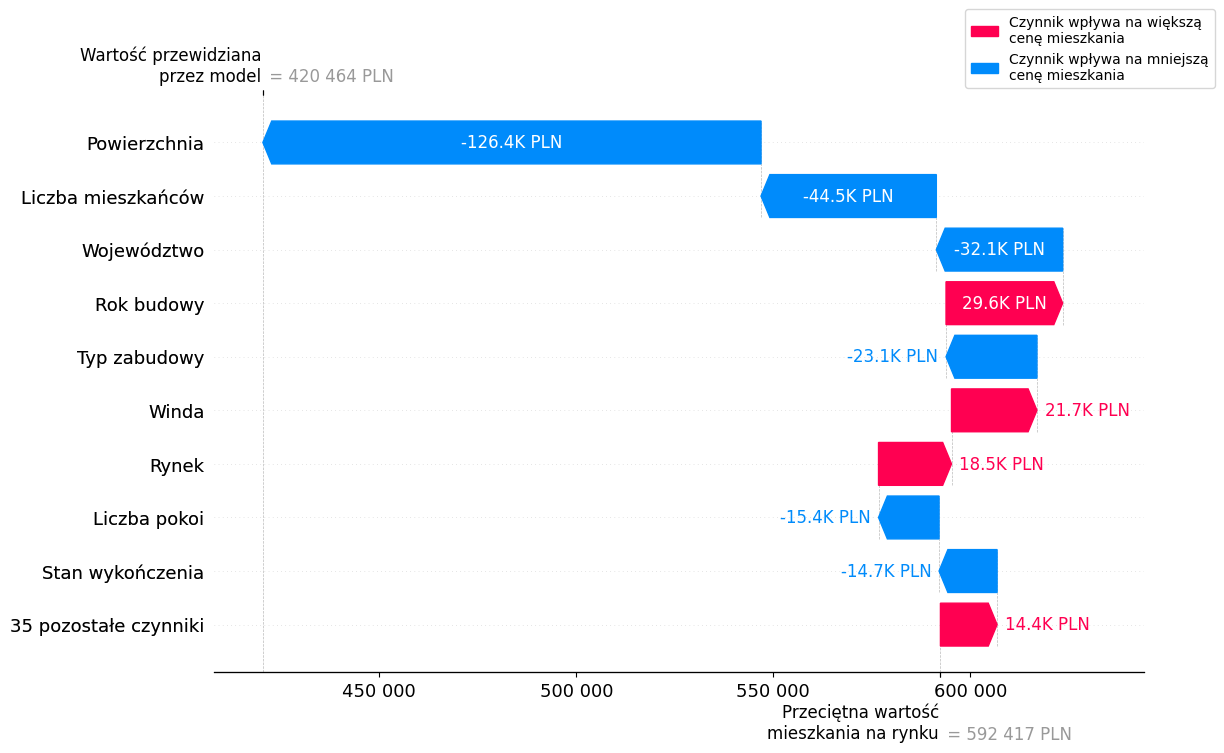

In [67]:
f_imp_obj, shap_values = feature_imp_report(X.iloc[[0]], model)
plt.show(f_imp_obj)

# Complete prediction report

In [58]:
def pred_result_show(y, shap_values):
    
    y_pred = float(shap_values.base_values.iloc[0]) + sum(shap_values.values)
    
    fig, ax = plt.subplots(figsize=(14, 0.8))
    ax.axis('off')

    y_val = y.iloc[0]

    if y_val:
        y_str = f"Cena mieszkania w ogłoszeniu: {y_val:,.0f} PLN".replace(",", " ")
        
        y_def = (y_val/y_pred-1)*100
        
        if y_def > 0:
                y_def_str = f"Mieszkanie jest o {y_def:,.2f}% droższe niż podobne mieszkania".replace(",", " ")
        else:
                y_def_str = f"Mieszkanie jest o {-y_def:,.2f}% tańsze niż podobne mieszkania".replace(",", " ")
                
        y_def_base = (y_val/float(shap_values.base_values.iloc[0])-1)*100        
        if y_def_base > 0:
                y_def_base_str = f"Mieszkanie jest o {y_def_base:,.2f}% droższe od średniej ceny na rynku".replace(",", " ")
        else:
                y_def_base_str = f"Mieszkanie jest o {-y_def_base:,.2f}% tańsze od średniej ceny na rynku".replace(",", " ")    
                
    else:
        y_str = f"Nie podano ceny w ogłoszeniu"
        y_def_str = ""
  
    y_pred_str = f"Cena mieszkania wg modelu: {y_pred:,.0f} PLN".replace(",", " ")    
        
    ax.text(0.02, 0.5,
                f"{y_str}\n{y_pred_str}\n{y_def_str}\n{y_def_base_str}",
                fontsize=16,
                verticalalignment='center',
                horizontalalignment='left')
    return fig

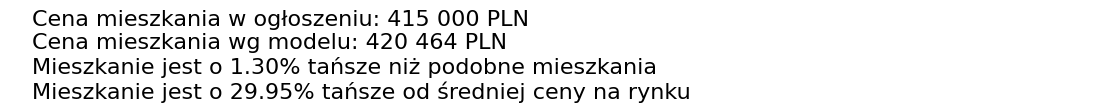

In [63]:
f_imp_obj, shap_values = feature_imp_report(X.iloc[[0]], model)
plt.close()
res_obj = pred_result_show(y.iloc[0], shap_values)
plt.show(res_obj)

In [65]:
def run_display(res_obj, f_imp_obj):
    tmpfile_res = BytesIO()
    res_obj.savefig(tmpfile_res, format='png', bbox_inches='tight')
    tmpfile_res.seek(0)
    plt.close()

    tmpfile_f_imp = BytesIO()
    f_imp_obj.savefig(tmpfile_f_imp, format='png', bbox_inches='tight')
    tmpfile_f_imp.seek(0)
    plt.close()

    res_widget = widgets.Image(
        value=tmpfile_res.getvalue(), format='png',
        layout=widgets.Layout(width='100%', height='auto', margin='0px')
    )

    f_imp_widget = widgets.Image(
        value=tmpfile_f_imp.getvalue(), format='png',
        layout=widgets.Layout(width='100%', height='auto')
    )

    display(widgets.VBox([res_widget, f_imp_widget]))

In [70]:
f_imp_obj, shap_values = feature_imp_report(X.iloc[[0]], model)
res_obj = pred_result_show(y.iloc[0], shap_values)
run_display(res_obj, f_imp_obj)

# Testing

In [69]:
for i in range(25):    
    f_imp_obj, shap_values = feature_imp_report(X.iloc[[i]], model)
    res_obj = pred_result_show(y.iloc[i], shap_values)
    run_display(res_obj, f_imp_obj)